<pre>

1.Implementing Classification Algorithms:
Design and implement decision tree, SVM, and k-NN classifiers. 
Evaluate their performance using confusion matrices, ROC curves, and other metrics on a dataset of your choice.

</pre>

### Support Vector Machines

In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [36]:
#load dataset from 

breast_cancer = datasets.load_breast_cancer()
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [37]:
X = breast_cancer.data
Y = breast_cancer.target

In [38]:
# train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [39]:
# standard scaler 

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [40]:
# support vector classifier
svc = SVC(C=1,random_state=1,kernel='linear')

# fit the model

svc.fit(X_train_std,Y_train)

SVC(C=1, kernel='linear', random_state=1)

In [41]:
# make predictions

y_predict = svc.predict(X_test_std)

# measure the performance

print("Accuracy score: %.3f"%metrics.accuracy_score(Y_test,y_predict))

Accuracy score: 0.977


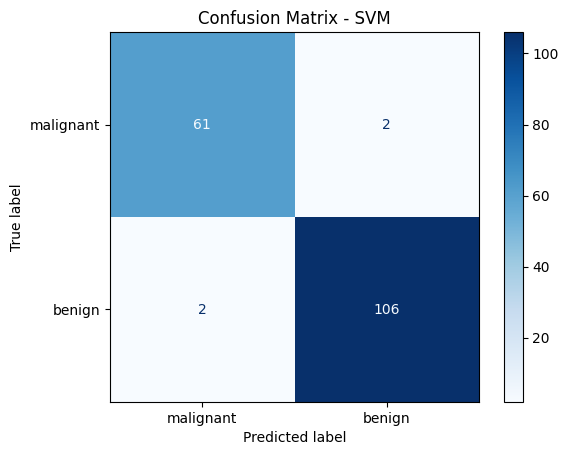

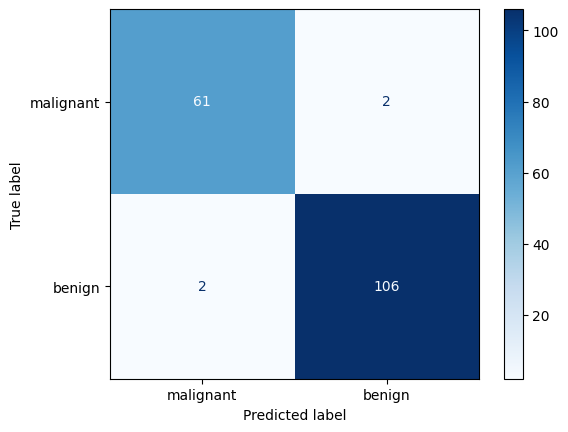

In [49]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Compute confusion matrix
# cm = confusion_matrix(Y_test, y_predict)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
# disp.plot(cmap="Blues")
# plt.title("Confusion Matrix")
# plt.show()

# Compute Confusion Matrix
cm = confusion_matrix(Y_test, y_predict)

# Display Confusion Matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap="Blues")

# Title
plt.title("Confusion Matrix - SVM")
plt.show()# Compute Confusion Matrix
cm = confusion_matrix(Y_test, y_predict)

# Display Confusion Matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap="Blues")

# # Title
# plt.title("Confusion Matrix - SVM")
# plt.show()

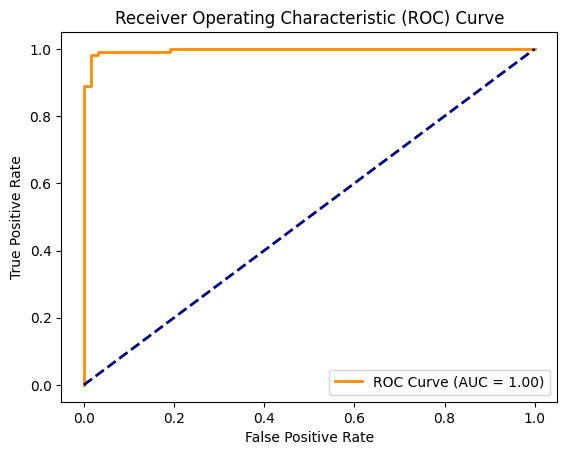

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities using decision_function
y_probs = svc.decision_function(X_test_std)

# Compute ROC curve
fpr, tpr, _ = roc_curve(Y_test, y_probs)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute metrics
accuracy = accuracy_score(Y_test, y_predict)
precision = precision_score(Y_test, y_predict, pos_label=1)
recall = recall_score(Y_test, y_predict, pos_label=1)
f1 = f1_score(Y_test, y_predict, pos_label=1)

# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.977
Precision: 0.981
Recall: 0.981
F1 Score: 0.981
